## Visualization and analysis of relationships in medical data
These analyses were done for the third project of the Data Analysis with Python Certification series on FreeCodeCamp

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Load medical data
Calculate BMI and obesity index (BMI>25)

In [6]:
df = pd.read_csv('./data/medical_examination.csv')
df['BMI'] = df['weight'] / (df['height']/100)**2
df['overweight'] = df.apply(lambda row: 1 if row.BMI >25 else 0, axis=1)


#### Normalize glucose and cholesterol data

In [7]:
df['cholesterol'] = df.apply(lambda row: 0 if row.cholesterol == 1 else 1, axis=1)
df['gluc'] = df.apply(lambda row: 0 if row.gluc ==1 else 1, axis=1)
df = df.drop(['BMI'], axis=1)

df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


#### Plot counts of each value for all categorical variables split by cardio

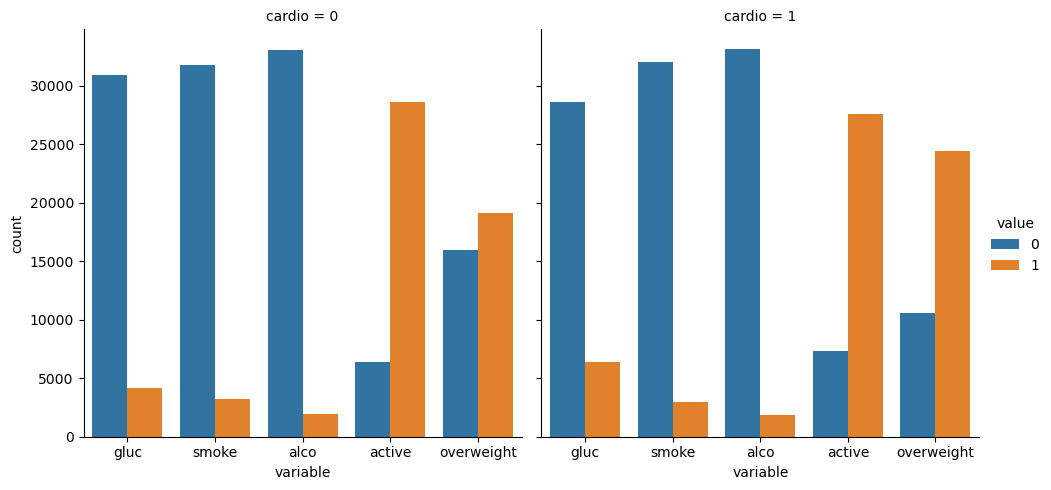

In [8]:
col_names = ['id','gluc','smoke','alco','active', 'overweight']
cardio0 = df[df.cardio==0][col_names]
cardio1 = df[df.cardio==1][col_names]

long0=pd.melt(cardio0, id_vars='id', value_vars = col_names, value_name = 'value', ignore_index = True)
long0['cardio']=0
long1=pd.melt(cardio1, id_vars='id', value_vars = col_names, value_name = 'value', ignore_index = True)
long1['cardio']=1

cat_data = pd.concat([long0, long1], axis=0)
cat_data

sns.catplot(x='variable', data=cat_data[cat_data.cardio.notnull()], kind='count', hue='value', col='cardio')


#### Data Cleaning

Remove patients whose diastolic pressure is higher than systolic pressure, these data are invalid

#### Remove outliers
Remove patients whose hight and weight are in the top and bottom 2.5%
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile

In [9]:
df_heat = df[(df['ap_lo'] <= df['ap_hi'])
               & (df['height'] >= df['height'].quantile(0.025)) &
               (df['height'] <= df['height'].quantile(0.975))
               & (df['weight'] >= df['weight'].quantile(0.025)) &
               (df['weight'] <= df['weight'].quantile(0.975))]
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [10]:
df_heat = df[(df['ap_lo'] <= df['ap_hi'])
               & (df['height'] >= df['height'].quantile(0.025)) &
               (df['height'] <= df['height'].quantile(0.975))
               & (df['weight'] >= df['weight'].quantile(0.025)) &
               (df['weight'] <= df['weight'].quantile(0.975))]

### Plot the correlation matrix

<Axes: >

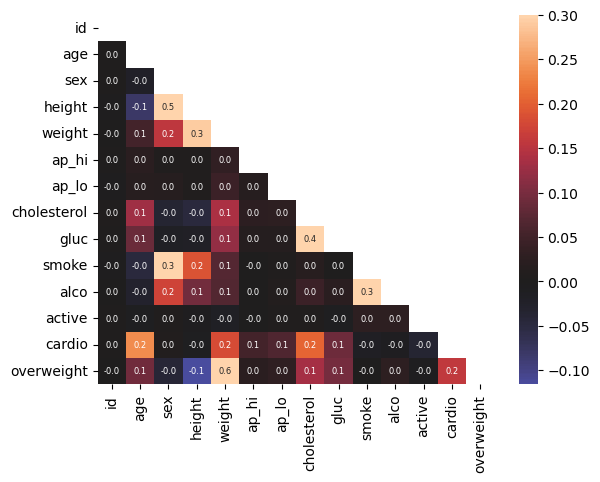

In [11]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(data=df.corr(),
              annot=True,
              fmt=".1f",
              mask=mask,
              annot_kws={'fontsize': 6},
              square=False,
              center=0,
              vmax=0.30)